# ----------------------EDA ---------------------------

In [1]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# loading dataset
df = pd.read_csv(r"C:\Users\IQRA SHAIKH\OneDrive\Documents\GitHub\Customer_Satisfaction_prediction\project\customer_support_tickets.csv")
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [3]:
# cheacking the shape of the datset
df.shape

(8469, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [5]:
df.describe()

,Ticket ID,Customer Age,Customer Satisfaction Rating
count,8469.000000,8469.000000,2769.000000
mean,4235.000000,44.026804,2.991333
std,2444.934048,15.296112,1.407016
min,1.000000,18.000000,1.000000
25%,2118.000000,31.000000,2.000000
50%,4235.000000,44.000000,3.000000
75%,6352.000000,57.000000,4.000000
max,8469.000000,70.000000,5.000000


In [6]:
df.isnull().sum()

Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64

# columns to keep
customer id                                                                                                                                             
customer age                                                                                                                                               
customer gender                                                                                                                                            
product purchased                                                                                                                                         
date of purchase                                                                                                                                            
ticket type                                                                                                                                              
ticket subject                                                                                                                                              
ticket description                                                                                                                                         
ticket status                                                                                                                                               
resolution                                                                                                                                                
ticket priority                                                                                                                                         
ticket channel                                                                                                                                              
first response time                                                                                                                                         
ratings                                      

In [7]:
df['Resolution'][3]

'Try capital clearly never color toward story.'

# EDA

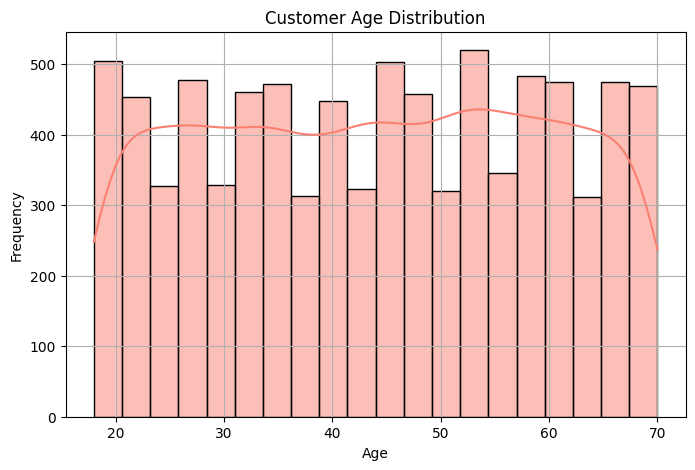

In [ ]:
# 1.Plot Customer Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Customer Age'], bins=20, kde=True, color='salmon')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

🧾 Conclusion: Customer Age Distribution

The histogram shows that customer ages are fairly evenly distributed across the 18–70 age range, with slightly higher frequencies in the age groups around 18–20 and 50–55. This suggests:

    The company has a diverse customer base across age groups.

    Young adults and middle-aged customers may be more active in raising support tickets.

    There is no sharp age skew, meaning age-based personalization or segmentation can be broad.

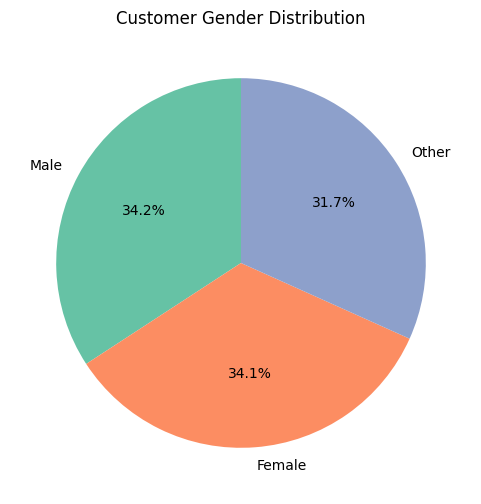

In [ ]:
# 2.Plot Gender Distribution
plt.figure(figsize=(6, 6))
df['Customer Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
plt.title("Customer Gender Distribution")
plt.ylabel('')
plt.show()

🧾 Conclusion: Customer Gender Distribution

The pie chart indicates a balanced gender distribution among customers:

    Male: 34.2%

    Female: 34.1%

    Other: 31.7%

This suggests the company serves a diverse and inclusive customer base, with nearly equal representation from all gender categories. Any customer experience improvements or marketing efforts should be gender-neutral or personalized across all groups.

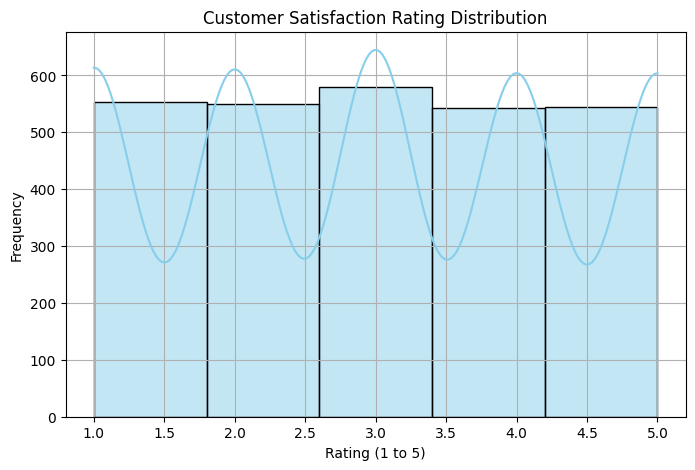

In [ ]:
# 3.Customer Satisfaction Rating Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Customer Satisfaction Rating'].dropna(), bins=5, kde=True, color='skyblue')
plt.title("Customer Satisfaction Rating Distribution")
plt.xlabel("Rating (1 to 5)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


🧾 Conclusion: Customer Satisfaction Rating Distribution

The histogram shows that customer satisfaction ratings are relatively balanced across the 1 to 5 scale:

    Each rating (1 to 5) has a comparable number of responses, with Rating 3 (Neutral) slightly more common.

    This suggests a mixed customer experience — neither highly satisfied nor highly dissatisfied overall.

    The moderate peak at Rating 3 indicates opportunities to improve service and shift neutral customers toward higher satisfaction.

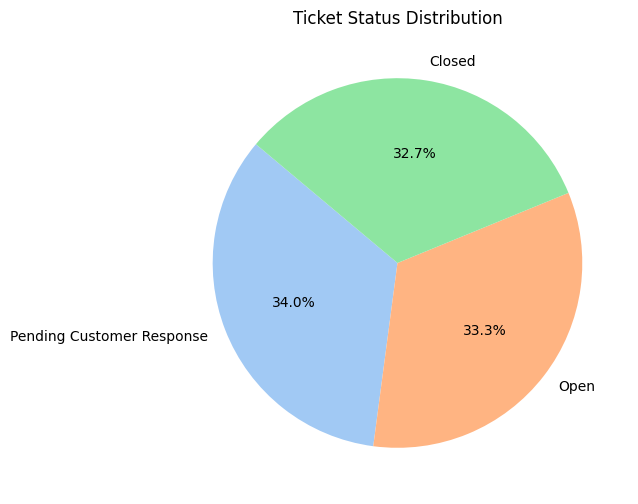

In [ ]:
# 4.Ticket Status Distribution
plt.figure(figsize=(6, 6))
df['Ticket Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Ticket Status Distribution")
plt.ylabel('')
plt.show()

🧾 Conclusion: Ticket Status Distribution

The pie chart shows that ticket statuses are evenly distributed across the three categories:

This indicates that:

    A large portion of tickets remain unresolved, either still open or awaiting customer replies.

    The relatively low closure rate suggests a need to improve response and resolution processes.

C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_18296\876388684.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Ticket Type', data=df, order=df['Ticket Type'].value_counts().index, palette='Set3')


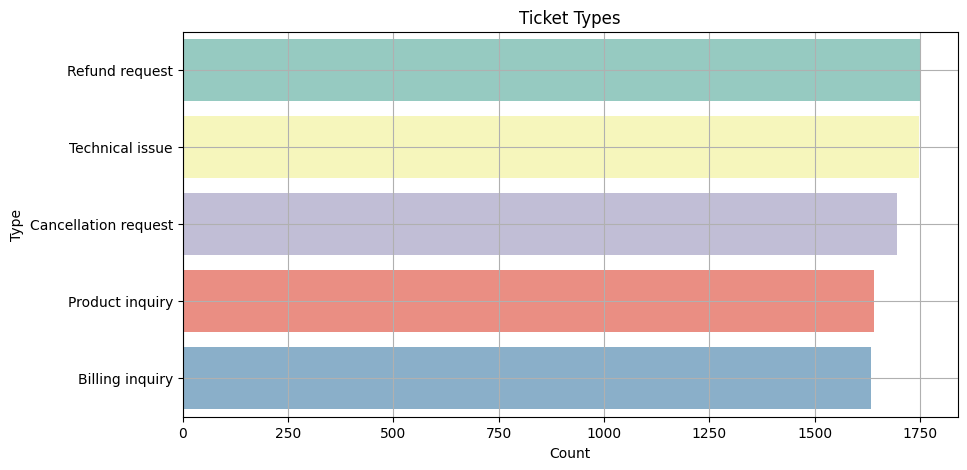

In [ ]:
# 5.Ticket Type
plt.figure(figsize=(10, 5))
sns.countplot(y='Ticket Type', data=df, order=df['Ticket Type'].value_counts().index, palette='Set3')
plt.title("Ticket Types")
plt.xlabel("Count")
plt.ylabel("Type")
plt.grid(True)
plt.show()


🧾 Conclusion: Ticket Type Distribution

The horizontal bar chart shows the most common types of customer support tickets:

    Refund requests and technical issues are the most frequently raised concerns, each exceeding 1,700 tickets.

    Cancellation, product, and billing inquiries follow closely with similar volumes.

🔍 This suggests:

    Customers often face product dissatisfaction or technical problems, leading to refunds or complaints.

    Post-purchase friction (like cancellations or billing issues) is also a significant concern.

📌 Recommendation: Focus on improving:

    Product reliability and user onboarding to reduce technical issues.

    Return/refund policies and clarity in billing processes to reduce support load.

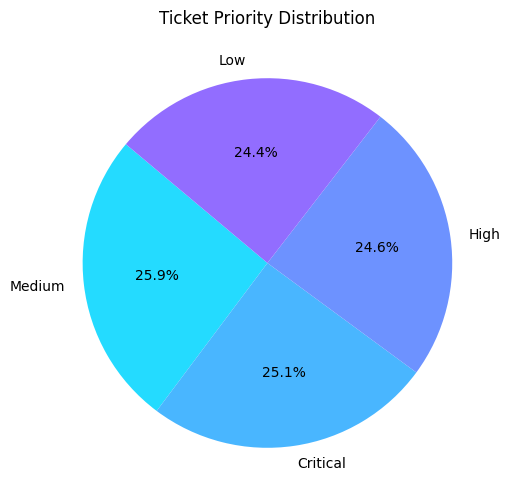

In [ ]:
# 6.Ticket Priority
plt.figure(figsize=(6, 6))
df['Ticket Priority'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('cool'))
plt.title("Ticket Priority Distribution")
plt.ylabel('')
plt.show()

# Conclusion:-                                                                                                                                            
This balance suggests:

    Customers are experiencing a wide range of issue severities, from minor to critical.

    The support team is dealing with a fairly equal mix of urgent and non-urgent tickets.

# BIvariate Analysis

C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_18296\3739050416.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=df, ci=None, palette='muted')
C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_18296\3739050416.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=df, ci=None, palette='muted')


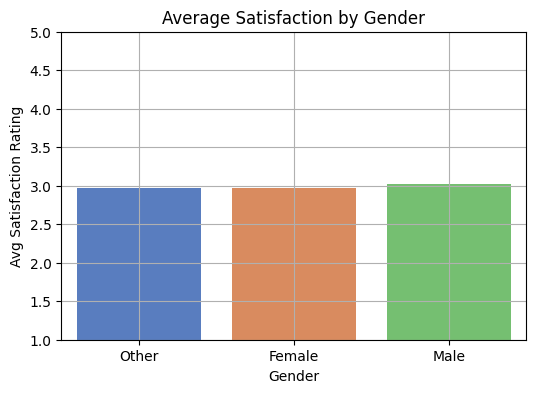

In [ ]:
# 7.Satisfaction by Gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Customer Gender', y='Customer Satisfaction Rating', data=df, ci=None, palette='muted')
plt.title("Average Satisfaction by Gender")
plt.ylabel("Avg Satisfaction Rating")
plt.xlabel("Gender")
plt.ylim(1, 5)
plt.grid(True)
plt.show()

# Conclusion                                                                                                                                              
🧾 Conclusion: Average Satisfaction by Gender

The bar chart shows that average customer satisfaction is fairly consistent across all genders, with slight variation:

    Male customers have the highest average rating, just above 3.0

    Female and Other gender categories have nearly identical satisfaction levels, slightly below 3.0

📊 This suggests:

    There is no major disparity in satisfaction across gender groups.

    Support quality appears to be uniformly delivered, regardless of gender identity.

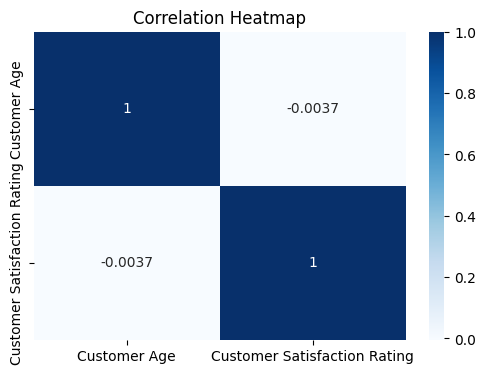

In [ ]:
# 8.Correlation Heatmap
numerical_cols = ['Customer Age', 'Customer Satisfaction Rating']
plt.figure(figsize=(6, 4))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

🧾 Conclusion: Correlation Heatmap (Customer Age vs. Satisfaction)

The heatmap reveals a very weak negative correlation of -0.0037 between:

    Customer Age and

    Customer Satisfaction Rating

📊 This indicates:

    There is virtually no linear relationship between a customer's age and how satisfied they are.

    Satisfaction appears to be influenced more by other factors (like ticket type, resolution time, or product issues), not age.

C:\Users\IQRA SHAIKH\AppData\Local\Temp\ipykernel_18296\2584097223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ticket Priority', y='Customer Satisfaction Rating', data=df, palette='coolwarm')


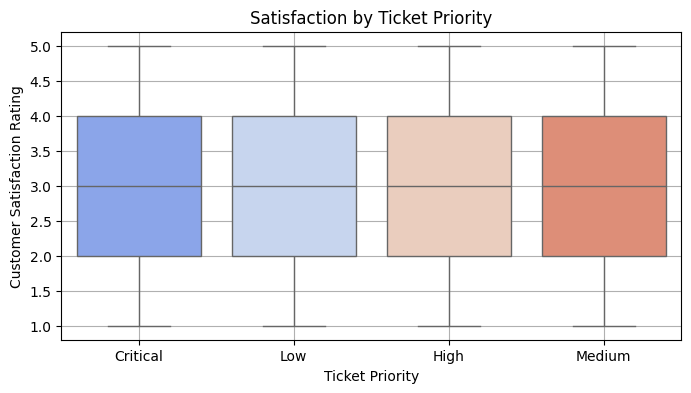

In [ ]:
# 8.Satisfaction by Ticket Priority
plt.figure(figsize=(8, 4))
sns.boxplot(x='Ticket Priority', y='Customer Satisfaction Rating', data=df, palette='coolwarm')
plt.title("Satisfaction by Ticket Priority")
plt.grid(True)
plt.show()


🧾 Conclusion: Satisfaction by Ticket Priority

The boxplot illustrates the distribution of customer satisfaction ratings across different ticket priority levels:

    All priority levels—Critical, High, Medium, and Low—have a similar median satisfaction score of around 3.

    The spread (IQR) and outliers are consistent across priorities, indicating that ticket priority does not significantly affect satisfaction ratings.